# Mobile Phone Recommendation System

### What is NLP?

<ul>
    <li>NLP (Natural Language Processing) is a set of techniques for approaching text problems that enables computer programs and functions to understand human speech as it is spoken.</li>
    <li>We are using the bag of words approach as it takes common concepts from machine learning like feature engineering and model building and tweaks them only slightly.</li>
</ul>

### About the data...

#### Context

The dataset contains approx. 400,000 reviews of unlocked mobile phones sold on Amazon.com to find out insights with respect to reviews, ratings, price and their relationships.

#### Data

Following fields are available in this dataset:
<ul>
   <li>Product Title</li>
   <li>Brand name</li>
   <li>Price</li>
   <li>Rating</li>
   <li>Review text</li>
   <li>Review Votes</li>
</ul>

Data was extracted in December, 2016 from the unlocked mobile category of Amazon.com.

In [ ]:
#### import os,sys
import pandas as pd
import numpy as np
import pandas as pd

#importing for plotting the graphs 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Download NLP Toolkit for 
import nltk 

#using Beautiful Soup for filtering Html tags
from bs4 import BeautifulSoup

# using model selection for splitting data into training and test data
from sklearn.model_selection import train_test_split 

# Import the stop word list and text data sets, including stop words
from nltk.corpus import stopwords
#'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're",
from nltk.tokenize import WordPunctTokenizer

In [3]:
#Reading the dataset using the "read_csv" function to read the labeled data

amazondata = pd.read_csv(r"C:\Users\Deepak Dipesh\Desktop\New Projects\Datasets\Amazon_Unlocked_Mobile.csv", 
                         header=0,error_bad_lines=False)

amazondata.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [6]:
len(amazondata['Product Name'].unique())

4410

#### There are 4410 phone models in this data set

In [7]:
len(amazondata['Brand Name'].unique())

385

#### There are 385 brands in this data set.

In [8]:
#identifying the number of rows and columns present in the data

amazondata.shape

(413840, 6)

In [10]:
# Creating a DataFrame by passing the dataset object to be converted to series-like for data-cleaning and
# pre-processsing
amazondata_df = pd.DataFrame(amazondata)

amazondata_df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0


### Data Cleaning and Text Preprocessing/Analysis

First, we'll remove the HTML tags. For this purpose, we'll use the Beautiful Soup library.

In [11]:
import warnings
warnings.filterwarnings('ignore')

amazondata_df = amazondata_df[pd.notnull(amazondata_df['Reviews'])] 

amazondata_df['Review Votes'].replace("", 0, inplace=True )

In [12]:
amazondata['Brand Name'].isnull().any()

True

In [13]:
amazondata_df = amazondata_df[pd.notnull(amazondata_df['Brand Name'])]

In [14]:
amazondata['Brand Name'].isnull().any()

True

In [15]:
amazondata

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0


#### Top 10 brands in the data set sorted on the basis of sum of Ratings.

In [16]:
info = pd.pivot_table(amazondata_df,index=['Brand Name'],values=['Rating', 'Review Votes'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
info = info.sort_values(by=('sum', 'Rating'), ascending = False)

info.head(10)

sum                   mean             
            Rating Review Votes    Rating Review Votes
Brand Name                                            
Samsung     260459        97620  3.962680     1.526099
BLU         239843        58364  3.792224     0.951747
Apple       228326       112255  3.924543     1.997953
LG           86087        23044  3.841455     1.060323
Nokia        64186        25963  3.819458     1.600185
BlackBerry   63126        21114  3.741465     1.279326
Motorola     51157        23107  3.812849     1.777051
HTC          44094        12803  3.465420     1.035506
CNPGD        39176        20151  3.106002     1.638026
OtterBox     35012         2268  4.383623     0.287817

#### CoRelation between price & rating

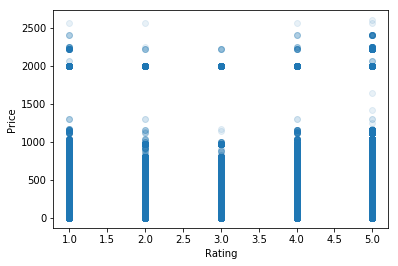

In [17]:
import matplotlib.pyplot as plt

ylabel = amazondata_df["Price"]
plt.ylabel("Price")
plt.xlabel("Rating")
xlabel = amazondata_df["Rating"]
plt.scatter(xlabel, ylabel, alpha=0.1)
plt.show()

#### CoRelation between Price and Review Votes

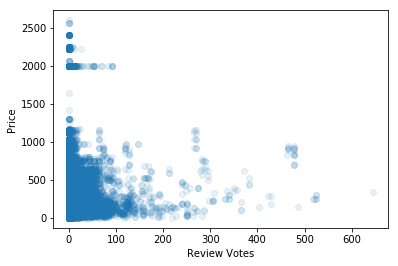

In [18]:
ylabel2 = amazondata_df["Price"]
plt.ylabel("Price")
xlabel2 = amazondata_df["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel2, ylabel2, alpha=0.1)
plt.show()

##### Strong co-relation between review votes and price.

#### CoRelation between Rating and Review Votes

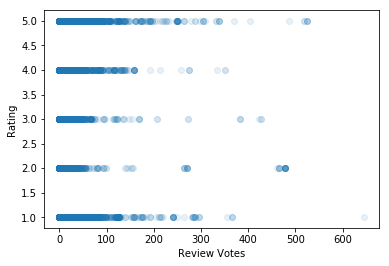

In [19]:
ylabel3 = amazondata_df["Rating"]
plt.ylabel("Rating")
xlabel3 = amazondata_df["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel3, ylabel3, alpha=0.1)
plt.show()

In [20]:
corr_matrix = amazondata_df.corr()
corr_matrix["Rating"].sort_values(ascending = False)

Rating          1.000000
Price           0.074609
Review Votes   -0.045892
Name: Rating, dtype: float64

##### It is observed that Rating has a NEGATIVE CORRELATION with Review Votes = -0.045892

In [21]:
corr_matrix = amazondata_df.corr()
corr_matrix["Price"].sort_values(ascending = False)

Price           1.000000
Rating          0.074609
Review Votes    0.022164
Name: Price, dtype: float64

##### It is observed that Rating has a POSITIVE CORRELATION with Price = 0.074609


## Questions to our dataset...

<ul>
   <li>Can we predict the rating and preference that a user will give to a particular product based on the existing data ?</li>
   <li>Find out how many reviews, ratings, and product name in the dataset are similar to the given keyword.</li>
</ul>

In [22]:
amazon_train, amazon_test = train_test_split(amazondata_df, test_size = .2, random_state=0)

In [23]:

import warnings
warnings.filterwarnings('ignore')

reviews_train = []

#coverting all the data within the review column to string datatypes
amazon_train['Reviews'] = amazon_train['Reviews'].astype(str)

In [24]:
#reset_index to drop the existing index and replace with new index

amazon_train.reset_index(drop=True, inplace=True)

In [25]:
#using BeautifulSoup to remove all the html tags that might be present in the review column of the amazon_train dataframe
for i in range (0,len(amazon_train)):
   reviews_train.append(BeautifulSoup(amazon_train["Reviews"][i],"lxml").get_text())

In [26]:
print(reviews_train[1])

Love the phone enjoying every moment of it. A great phone


#### NLTK function to find sentiment value and sentiment

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

In [28]:
sample = amazon_train['Reviews'][50]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

Poweful with a great looking display. I have taken a few pictures and not experienced any flaws so far. The eye software is the best on the market and makes the phone fun to play with. Overall this phone gets my five rating for price and features. Get it while you can.
Sentiment: 
0.9


In [29]:
all_sent_values = []
all_sentiments = []

In [30]:
#for i in range(0,20000):
for i in range(0,len(amazon_train['Reviews'])): 
    all_sent_values.append(sentiment_value(reviews_train[i]))

In [31]:
len(all_sent_values)


278898

In [32]:
#Sentiment Analysis on first 20,000 rows
temp_data = amazondata_df[0:len(amazon_train['Reviews'])]

In [34]:
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,len(amazon_train['Reviews'])):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        SENTIMENT.append('V.Positive')
        SENTIMENT_VALUE.append(5)
    elif (sent<0.5 and sent>0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('V.Negative')
        SENTIMENT_VALUE.append(1)

In [35]:
temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE
temp_data['SENTIMENT'] = SENTIMENT

In [36]:
temp_data.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,SENTIMENT_VALUE,SENTIMENT
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,3,Neutral
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,5,V.Positive
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,4,Positive
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,3,Neutral
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,5,V.Positive
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0,4,Positive
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0,5,V.Positive
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0,5,V.Positive
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0,5,V.Positive
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0,1,V.Negative


### Recommendation by Brand names

In [37]:
testing2 = pd.pivot_table(temp_data,index=['Brand Name'],values=['Rating', 'Review Votes','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing2 = testing2.sort_values(by=('sum', 'Rating'), ascending = False)
testing2.head(10)

sum                                   mean               \
            Rating Review Votes SENTIMENT_VALUE    Rating Review Votes   
Brand Name                                                               
BLU         233625        55000          243042  3.813850     0.925832   
Apple       227816       111954          229392  3.924682     1.996932   
LG           78693        21233           80652  3.853533     1.073078   
Samsung      78526        32742           77911  3.974792     1.706112   
Nokia        64162        25947           66638  3.819849     1.599988   
BlackBerry   62931        20885           66675  3.745670     1.270918   
Motorola     49888        22520           51308  3.828409     1.781928   
HTC          43383        12472           49360  3.479548     1.029978   
CNPGD        39176        20151           49780  3.106002     1.638026   
OtterBox     35012         2268           31641  4.383623     0.287817   

                            
           SENTIMENT_VALUE  
Brand Name                  
BLU               3.967579  
Apple             3.951832  
LG                3.949464  
Samsung           3.943663  
Nokia             3.967256  
BlackBerry        3.968514  
Motorola          3.937380  
HTC               3.958935  
CNPGD             3.946722  
OtterBox          3.961563

Top 10 Phone Brands

<ul>
    <li>BLU</li>
    <li>Apple</li>
    <li>LG</li>
    <li>Samsung</li>
    <li>Nokia</li>
    <li>BlackBerry</li>
    <li>Motorola</li>
    <li>HTC</li>
    <li>CNPGD</li>
    <li>OtterBox</li>
    
</ul>

### Recommendation by phone model or product name

In [38]:
#Top Phone Models

testing3 = pd.pivot_table(temp_data,index=['Product Name'],values=['Rating', 'Review Votes','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing3 = testing3.sort_values(by=('sum', 'Rating'), ascending = False)
testing3.head(10)

sum               \
                                                   Rating Review Votes   
Product Name                                                             
BLU Studio 5.0 C HD Unlocked Cellphone, Black        5030          772   
Motorola Moto E (1st Generation) - Black - 4 GB...   4980         1046   
Motorola Moto E (1st Generation) - Black - 4 GB...   4664          937   
OtterBox Iphone 5/5S/SE Defender Case w/ Drop a...   4488          320   
Huawei Mate 2 - Factory Unlocked (Black)             4479         2709   
Apple iPhone 5s 32GB (Silver) - AT&T                 4460         1557   
Apple iPhone 5s AT&T Cellphone, 16GB, Silver         4267         1315   
BLU Energy X Plus Smartphone - With 4000 mAh Su...   4213          712   
BLU Dash JR 4.0 K Smartphone - Unlocked - White      4084          281   
Apple iPhone 5s 32GB (Gold) - AT&T                   4020         1405   

                                                                        mean  \
                                                   SENTIMENT_VALUE    Rating   
Product Name                                                                   
BLU Studio 5.0 C HD Unlocked Cellphone, Black                 4776  4.212730   
Motorola Moto E (1st Generation) - Black - 4 GB...            4377  4.418811   
Motorola Moto E (1st Generation) - Black - 4 GB...            4169  4.412488   
OtterBox Iphone 5/5S/SE Defender Case w/ Drop a...            4383  3.975199   
Huawei Mate 2 - Factory Unlocked (Black)                      4000  4.452286   
Apple iPhone 5s 32GB (Silver) - AT&T                          4443  3.989267   
Apple iPhone 5s AT&T Cellphone, 16GB, Silver                  4291  3.950926   
BLU Energy X Plus Smartphone - With 4000 mAh Su...            4436  3.792079   
BLU Dash JR 4.0 K Smartphone - Unlocked - White               3986  4.047572   
Apple iPhone 5s 32GB (Gold) - AT&T                            3978  3.980198   

                                                                 \
                                                   Review Votes   
Product Name                                                      
BLU Studio 5.0 C HD Unlocked Cellphone, Black          0.688057   
Motorola Moto E (1st Generation) - Black - 4 GB...     0.978485   
Motorola Moto E (1st Generation) - Black - 4 GB...     0.966976   
OtterBox Iphone 5/5S/SE Defender Case w/ Drop a...     0.286996   
Huawei Mate 2 - Factory Unlocked (Black)               3.033595   
Apple iPhone 5s 32GB (Silver) - AT&T                   1.468868   
Apple iPhone 5s AT&T Cellphone, 16GB, Silver           1.312375   
BLU Energy X Plus Smartphone - With 4000 mAh Su...     0.668545   
BLU Dash JR 4.0 K Smartphone - Unlocked - White        0.282412   
Apple iPhone 5s 32GB (Gold) - AT&T                     1.462019   

                                                                    
                                                   SENTIMENT_VALUE  
Product Name                                                        
BLU Studio 5.0 C HD Unlocked Cellphone, Black             4.000000  
Motorola Moto E (1st Generation) - Black - 4 GB...        3.883762  
Motorola Moto E (1st Generation) - Black - 4 GB...        3.944182  
OtterBox Iphone 5/5S/SE Defender Case w/ Drop a...        3.882197  
Huawei Mate 2 - Factory Unlocked (Black)                  3.976143  
Apple iPhone 5s 32GB (Silver) - AT&T                      3.974061  
Apple iPhone 5s AT&T Cellphone, 16GB, Silver              3.973148  
BLU Energy X Plus Smartphone - With 4000 mAh Su...        3.992799  
BLU Dash JR 4.0 K Smartphone - Unlocked - White           3.950446  
Apple iPhone 5s 32GB (Gold) - AT&T                        3.938614

### Reference

https://data.world/promptcloud/amazon-mobile-phone-reviews

http://www.rroij.com/open-access/text-mining-concepts-process-and-applications-36-39.pdf

http://blog.aylien.com/10-common-nlp-terms-explained-for-the-text/

https://machinelearningmastery.com/gentle-introduction-bag-words-model/

http://textminingonline.com/dive-into-nltk-part-i-getting-started-with-nltk

https://stackoverflow.com/questions/1833252/java-stanford-nlp-part-of-speech-labels